# Fit

## Fonction de fit

* Paramètres $p$ (il peux y avoir plusieurs paramètres
* Fonction de fit qui dépend de des paramètres $p$ et d'une variable $x$ ($x$ n'est pas forcement un nombre)

##  Mesure

On effectue un ensemble de mesure $y_i$ ($y_i$ est un nombre) correspondant à un ensemble de variables $x_i$. La mesure est entachée de bruit. Pour chaque mesure, on note $\epsilon_i$ l'écart par rapport à la mesure.

$$ 
y_i = f(x_i, p) + \epsilon_i
$$

On suppose qu'il n'y a pas de biais ($<\epsilon_i>=0$) et que pour chaque point, le bruit est distribué de façon gaussienne (ecart type $\sigma_i$)

## Vraissemblance

On note $\mathcal L (p)$ la fonction de vraissemblance définie par :

$$\mathcal L(p) = e^{-\chi^2(p, \{x_i\})}$$ 

où 

$$\chi^2(p, \{x_i\}) = \sum_i \frac{(f(x_i, p) - y_i)^2}{\sigma_i^2}$$

Un estimateur de $p$ est donné par le maximum de la vraissemblance (i.e. le minimum du $\chi^2$). Cet estimateur dépend des $\epsilon_i$, c'est donc une variable aléatoire. Si on réalise un grand nombre de fois l'expérience, les points $p$ vont former une distribution. Si la fonction $f$ est suffisament régulière et qu'il y a suffisament de mesures $y_i$, alors on peut montrer que cette distribution est proportionnelle à la fonction $\mathcal{L}$. 

## Fit en Python

```
from scipy.optimize import curfe_fit

def f(x, p_1, p_2, ...):
    ...
    return y
    
popt, pcov = curve_fit(f, xdata, ydata, p_0)
```

Les variable `xdata` et `ydata` sont des tableaux/listes de tailles $N$. La paramètre $p_0$ est un tableau/list correspondant aux paramètres initiaux du fit. Il est indispendable (sauf pour les fits linéaires). 

La variable `popt` correspond aux paramètres optimaux et la variable `pcov` à la matrice de covariance.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

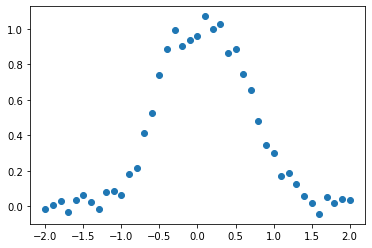

In [11]:
x, data = np.loadtxt('data.txt', unpack=True)
plt.plot(X, data, 'o')

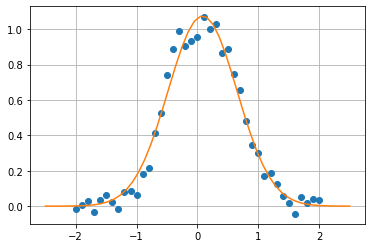

In [19]:
def fit_function(x, amplitude, largeur, centre):
    return amplitude*np.exp(-(x-centre)**2/(2*largeur**2))


plt.plot(X, data, 'o')
x_plot = np.linspace(-2.5, 2.5)
# Uncomment to see the curve with inital parameters
#plt.plot(x_plot, fit_function(x_plot, amplitude=1,
#                         largeur=.5, 
#                         centre=0))
init_param = [1, .5, 0]
#plt.plot(x_plot, fit_function(x_plot, *init_param))

popt, pcov = curve_fit(fit_function, X, data, init_param)
plt.plot(x_plot, fit_function(x_plot, *popt))
plt.grid()

In [15]:
popt

array([1.07550429, 0.56628413, 0.08353584])

In [20]:
pcov

array([[ 5.42596005e-04, -1.90482807e-04, -5.90509736e-09],
       [-1.90482807e-04,  2.00594006e-04,  6.76028019e-09],
       [-5.90509736e-09,  6.76028019e-09,  2.00565049e-04]])

In [18]:
def fit_function(x, y, p1, p2):
    z = ...
    return z

In [ ]:
def autre_fonction(X, p1, p2):
    x = X[0]
    y = X[1]
    return fit_function(x, y, p1, p2)